In [495]:
import numpy as np
import pandas as pd

import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [496]:
df1 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link1.csv')
df2 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link2.csv')
df3 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link3.csv')
df4 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link4.csv')
df5 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link5.csv')
df6 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link6.csv')
df7 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link7.csv')
df8 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link8.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df

,Timestamp,Tx_Packet,Rx_Packet,Dropped,BW_Utilization
0,2020-11-06 04:30:24,35,40,1,5.350082e+04
1,2020-11-06 04:31:21,31,32,1,4.268065e+04
2,2020-11-06 04:36:47,96,5,0,2.316020e+05
3,2020-11-06 04:36:48,279,1,0,7.290360e+05
4,2020-11-06 04:36:49,281,1,0,7.342800e+05
...,...,...,...,...,...
119,2020-11-06 04:39:39,305,1,0,4.268540e+05
120,2020-11-06 04:39:40,912,1,0,1.280040e+06
121,2020-11-06 04:39:41,1077,1,0,1.630458e+06
122,2020-11-06 04:39:42,1263,3,0,1.792575e+06


In [497]:
# Because we will predict BW Util

df = df.reset_index()['BW_Utilization']

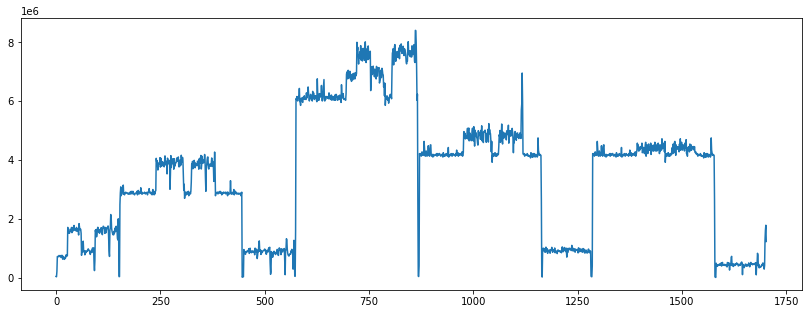

In [498]:
import matplotlib.pyplot as plt

plt.figure(figsize =(14,5))
plt.plot(df)

In [499]:
# Scaling data

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

df

array([[0.00389524],
       [0.00260495],
       [0.02513358],
       ...,
       [0.19194541],
       [0.21127766],
       [0.14563266]])

In [500]:
df.shape

(1703, 1)

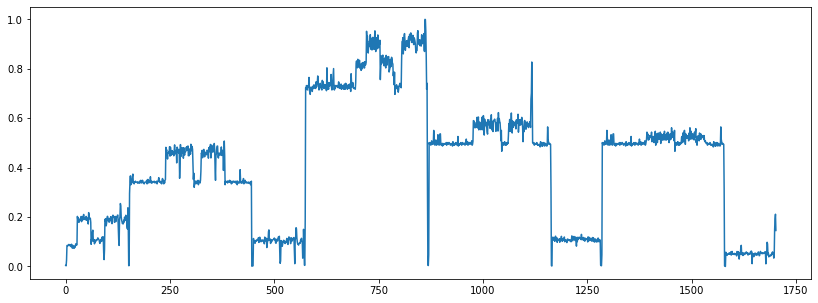

In [501]:
plt.figure(figsize =(14,5))
plt.plot(df)

In [502]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size


train_data, test_data = df[0:training_size,:] , df[training_size:len(df),:1]

In [503]:
import numpy
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [504]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [505]:
X_train.shape

(1076, 200)

In [506]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [507]:
from tensorflow.keras.regularizers import l2

In [508]:
model=Sequential()

model.add(LSTM(100,return_sequences=True,input_shape=(200,1), activation="relu", kernel_regularizer=l2(0.005)\
               , recurrent_regularizer=l2(0.005), bias_regularizer=l2(0.005)))
#model.add(LSTM(80,dropout=0.2,recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(50, activation="relu", kernel_regularizer=l2(0.005), recurrent_regularizer=l2(0.005)\
               , bias_regularizer=l2(0.005)))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [509]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStop=EarlyStopping(monitor="val_loss",verbose=1,mode='min',patience=5)

In [510]:
#Train the model

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks=[earlyStop])

Train on 1076 samples, validate on 225 samples
Epoch 1/100
1076/1076 [==============================] - 14s 13ms/sample - loss: 2.0582 - val_loss: 1.7255
Epoch 2/100
1076/1076 [==============================] - 9s 9ms/sample - loss: 1.5257 - val_loss: 1.3543
Epoch 3/100
1076/1076 [==============================] - 9s 9ms/sample - loss: 1.2314 - val_loss: 1.1170
Epoch 4/100
1076/1076 [==============================] - 10s 10ms/sample - loss: 1.0332 - val_loss: 0.9537
Epoch 5/100
1076/1076 [==============================] - 10s 10ms/sample - loss: 0.8963 - val_loss: 0.8390
Epoch 6/100
1076/1076 [==============================] - 9s 8ms/sample - loss: 0.7992 - val_loss: 0.7571
Epoch 7/100
1076/1076 [==============================] - 10s 9ms/sample - loss: 0.7284 - val_loss: 0.6974
Epoch 8/100
1076/1076 [==============================] - 9s 8ms/sample - loss: 0.6745 - val_loss: 0.6510
Epoch 9/100
1076/1076 [==============================] - 10s 9ms/sample - loss: 0.6324 - val_loss: 0.6124


1076/1076 [==============================] - 9s 8ms/sample - loss: 0.0294 - val_loss: 0.0289
Epoch 78/100
1076/1076 [==============================] - 10s 9ms/sample - loss: 0.0282 - val_loss: 0.0263
Epoch 79/100
1076/1076 [==============================] - 8s 8ms/sample - loss: 0.0270 - val_loss: 0.0251
Epoch 80/100
1076/1076 [==============================] - 7s 7ms/sample - loss: 0.0260 - val_loss: 0.0253
Epoch 81/100
1076/1076 [==============================] - 7s 7ms/sample - loss: 0.0250 - val_loss: 0.0232
Epoch 82/100
1076/1076 [==============================] - 8s 7ms/sample - loss: 0.0242 - val_loss: 0.0224
Epoch 83/100
1076/1076 [==============================] - 8s 8ms/sample - loss: 0.0232 - val_loss: 0.0225
Epoch 84/100
1076/1076 [==============================] - 9s 8ms/sample - loss: 0.0226 - val_loss: 0.0231
Epoch 85/100
1076/1076 [==============================] - 10s 9ms/sample - loss: 0.0221 - val_loss: 0.0200
Epoch 86/100
1076/1076 [==============================] -

In [511]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [512]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.06398068610532834

In [513]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.05599368896287174

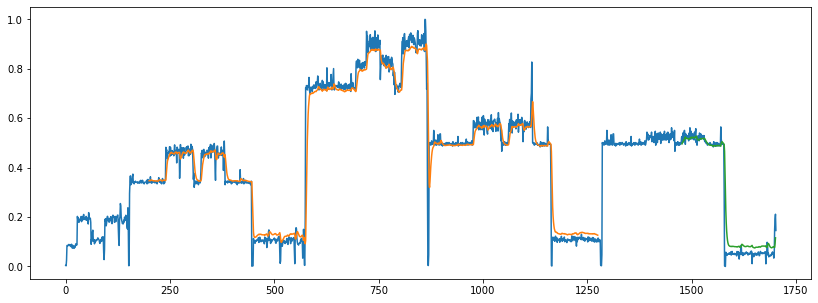

In [514]:
### Plotting 
# shift train predictions for plotting
# look back = timestep

look_back=200

trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize =(14,5))
#plt.plot(scaler.inverse_transform(df))
plt.plot(df)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#ORANGE = Train predicted Data
#GREEN = Test predicted Data

In [515]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [516]:
math.sqrt(mean_squared_error(y_train,train_predict))

4488554.193372062

In [517]:
math.sqrt(mean_squared_error(ytest,test_predict))

2949308.084240743

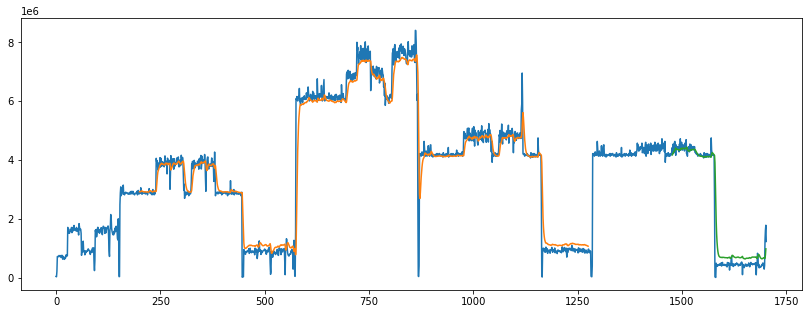

In [518]:
### Plotting 
# shift train predictions for plotting
# look back = timestep

look_back=200

trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize =(14,5))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#ORANGE = Train predicted Data
#GREEN = Test predicted Data